# Import dependencies and determine working directory

In [36]:
# Import libraries
from os import path
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
import matplotlib.pyplot as plt
import time

In [2]:
# Importing the Keras libraries and packages
# import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


# Load training data

In [3]:
# Load data from pickled file 
filename_in__images_train = path.join('..', '04_processed_data','images_train.pkl')
filename_in__emotions_train = path.join('..', '04_processed_data','emotions_train.pkl')

X_train = joblib.load(filename_in__images_train)
y_train = joblib.load(filename_in__emotions_train)

In [4]:
filename_in__images_test = path.join('..', '04_processed_data','images_test.pkl')
filename_in__emotions_test = path.join('..', '04_processed_data','emotions_test.pkl')

X_test = joblib.load(filename_in__images_test)
y_test = joblib.load(filename_in__emotions_test)

# Build a CNN model

In [5]:
def reshape_image(array_in):
    image_side = int(array_in.shape[1]**0.5)
    array_2d = []
    for row in array_in: 
        array_2d.append(np.reshape(row, (image_side, image_side, 1) ) )
    array_2d = np.array(array_2d)
    return array_2d

In [6]:
# reshape data
X_train = reshape_image(X_train)
X_test = reshape_image(X_test)

In [7]:
# get parameters for input data 
input_shape = (X_train.shape[1] , X_train.shape[2], X_train.shape[3])
num_classes = len(set(y_train))

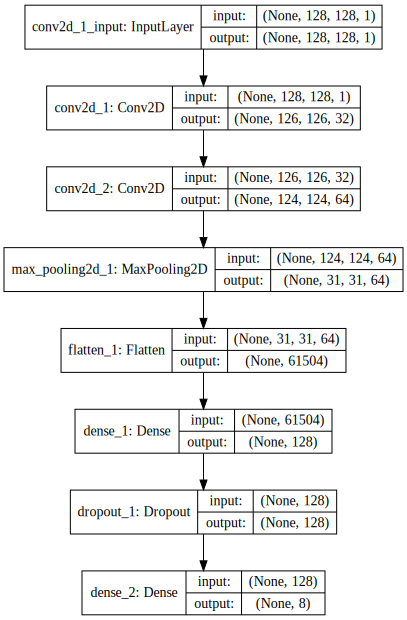

In [8]:
def construct_architecture_1(input_shape, num_classes):
    # instantiate model
    dnn_model = Sequential()
    # add convolution and pooling layers
    dnn_model.add(Conv2D(32, kernel_size=(3, 3), input_shape = input_shape, activation = 'relu'))
    dnn_model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
    dnn_model.add(MaxPooling2D(pool_size = (4, 4)))
    dnn_model.add(Flatten())
    # add dense layers
    dnn_model.add(Dense(128, activation ='relu' ))
    dnn_model.add(Dropout(0.25))
    # define output layer
    dnn_model.add(Dense(num_classes, activation='softmax'))
    # compile model
    dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return dnn_model

# Create model instance
classifier_01 = construct_architecture_1(input_shape, num_classes)

# Vizualize network achitecture
SVG(model_to_dot(classifier_01, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

# Run model

In [9]:
def save_files(classifier, history, filename):
    
    print(history.history)
    # create filepaths
    classifier_name = filename + '_model.h5'
    filename_out__classifier = path.join('..', '04_processed_data', classifier_name)
    # save model
    classifier.save(filename_out__classifier)

    print('Model saved')

In [10]:
# create a function that fits to training data
def run_model(classifier, filename):
    # Define early_stopping_monitor
    early_stopping_monitor = EarlyStopping(monitor='val_acc', patience=10)
    # Fit classifier
    history = classifier.fit(X_train, pd.get_dummies(y_train), epochs=20, 
                            batch_size = 128, validation_split=0.1, callbacks=[early_stopping_monitor])
    save_files(classifier, history, filename)
    
    return classifier

In [22]:
# Run on classifier 1
classifier_01 = run_model(classifier_01, 'classifier_01')

Train on 4767 samples, validate on 530 samples
Epoch 1/20
4767/4767 [==============================] - 343s 72ms/step - loss: 13.0091 - acc: 0.1884 - val_loss: 15.0233 - val_acc: 0.0679
Epoch 2/20
4767/4767 [==============================] - 347s 73ms/step - loss: 13.0311 - acc: 0.1915 - val_loss: 15.0233 - val_acc: 0.0679
Epoch 3/20
4767/4767 [==============================] - 338s 71ms/step - loss: 13.0243 - acc: 0.1919 - val_loss: 15.0233 - val_acc: 0.0679
Epoch 4/20
4767/4767 [==============================] - 349s 73ms/step - loss: 13.0446 - acc: 0.1907 - val_loss: 15.0233 - val_acc: 0.0679
Epoch 5/20
4767/4767 [==============================] - 360s 76ms/step - loss: 13.0378 - acc: 0.1911 - val_loss: 15.0233 - val_acc: 0.0679
Epoch 6/20
4767/4767 [==============================] - 3289s 690ms/step - loss: 13.0243 - acc: 0.1919 - val_loss: 15.0233 - val_acc: 0.0679
Epoch 7/20
4767/4767 [==============================] - 378s 79ms/step - loss: 13.0243 - acc: 0.1919 - val_loss: 15.0

# Test other architectures

In [11]:
def construct_architecture_2(input_shape, num_classes):
    # instantiate model
    dnn_model = Sequential()
    # add convolution and pooling layers
    dnn_model.add(Conv2D(32, kernel_size=(3, 3), input_shape = input_shape, activation = 'relu'))
    dnn_model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
    dnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    dnn_model.add(Flatten())
    # add dense layers
    dnn_model.add(Dense(128, activation ='relu' ))
    dnn_model.add(Dropout(0.25))
    # define output layer
    dnn_model.add(Dense(num_classes, activation='softmax'))
    # compile model
    dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return dnn_model

# Create model instance
classifier_02 = construct_architecture_2(input_shape, num_classes)

# Run classifier
classifier_02 = run_model(classifier_02, 'classifier_02')

Train on 4767 samples, validate on 530 samples
Epoch 1/20
4767/4767 [==============================] - 918s 193ms/step - loss: 12.6160 - acc: 0.2156 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 2/20
4767/4767 [==============================] - 987s 207ms/step - loss: 12.4993 - acc: 0.2245 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 3/20
4767/4767 [==============================] - 1076s 226ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 4/20
4767/4767 [==============================] - 778s 163ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 5/20
4767/4767 [==============================] - 529s 111ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 6/20
4767/4767 [==============================] - 498s 104ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 7/20
4767/4767 [==============================] - 484s 101ms/step - loss: 12.4394 - acc: 0.2282 - val_loss

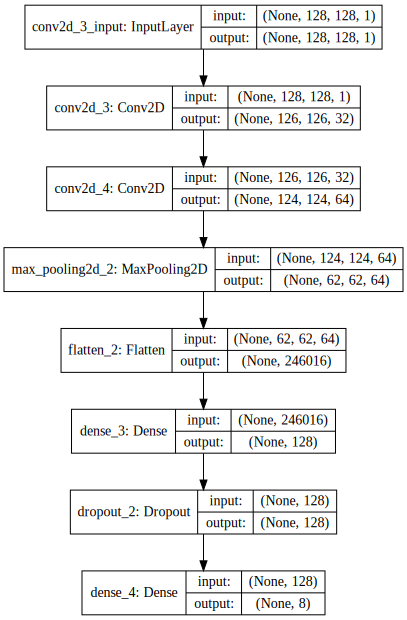

In [15]:
# Vizualize network achitecture
SVG(model_to_dot(classifier_02, show_shapes=True, show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [12]:
def construct_architecture_3(input_shape, num_classes):
    # instantiate model
    dnn_model = Sequential()
    # add convolution and pooling layers
    dnn_model.add(Conv2D(32, kernel_size=(3, 3), input_shape = input_shape, activation = 'relu'))
    dnn_model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
    dnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    dnn_model.add(Flatten())
    # add dense layers
    dnn_model.add(Dense(128, activation ='relu' ))
    dnn_model.add(Dropout(0.25))
    dnn_model.add(Dense(128, activation ='relu' ))
    dnn_model.add(Dropout(0.25))
    # define output layer
    dnn_model.add(Dense(num_classes, activation='softmax'))
    # compile model
    dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return dnn_model

# Create model instance
classifier_03 = construct_architecture_3(input_shape, num_classes)

# Run classifier
classifier_03 = run_model(classifier_03, 'classifier_03')

Train on 4767 samples, validate on 530 samples
Epoch 1/20
4767/4767 [==============================] - 499s 105ms/step - loss: 13.0700 - acc: 0.1861 - val_loss: 15.1449 - val_acc: 0.0604
Epoch 2/20
4767/4767 [==============================] - 467s 98ms/step - loss: 13.1122 - acc: 0.1865 - val_loss: 15.1449 - val_acc: 0.0604
Epoch 3/20
4767/4767 [==============================] - 479s 100ms/step - loss: 13.0987 - acc: 0.1873 - val_loss: 15.1449 - val_acc: 0.0604
Epoch 4/20
4767/4767 [==============================] - 447s 94ms/step - loss: 13.1122 - acc: 0.1865 - val_loss: 15.1449 - val_acc: 0.0604
Epoch 5/20
4767/4767 [==============================] - 515s 108ms/step - loss: 13.1122 - acc: 0.1865 - val_loss: 15.1449 - val_acc: 0.0604
Epoch 6/20
4767/4767 [==============================] - 494s 104ms/step - loss: 13.0987 - acc: 0.1873 - val_loss: 15.1449 - val_acc: 0.0604
Epoch 7/20
4767/4767 [==============================] - 522s 110ms/step - loss: 13.1055 - acc: 0.1869 - val_loss: 1

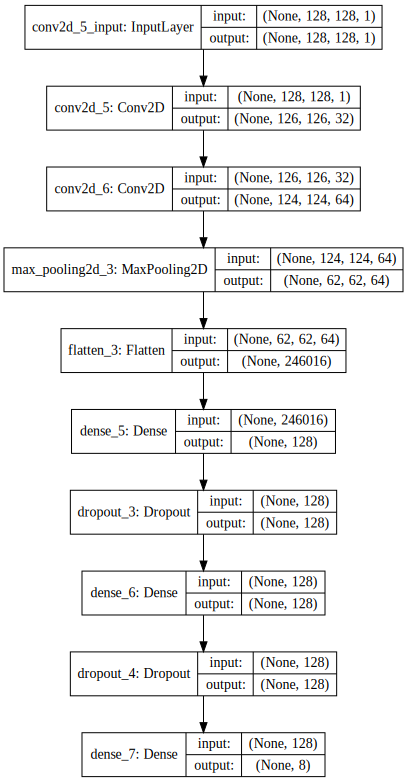

In [16]:
# Vizualize network achitecture
SVG(model_to_dot(classifier_03, show_shapes=True, show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [13]:
def construct_architecture_4(input_shape, num_classes):
    # instantiate model
    dnn_model = Sequential()
    # add convolution and pooling layers
    dnn_model.add(Conv2D(32, kernel_size=(3, 3), input_shape = input_shape, activation = 'relu'))
    dnn_model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
    dnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    dnn_model.add(Flatten())
    # add dense layers
    dnn_model.add(Dense(256, activation ='relu' ))
    dnn_model.add(Dropout(0.25))
    dnn_model.add(Dense(256, activation ='relu' ))
    dnn_model.add(Dropout(0.25))
    # define output layer
    dnn_model.add(Dense(num_classes, activation='softmax'))
    # compile model
    dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return dnn_model

# Create model instance
classifier_04 = construct_architecture_4(input_shape, num_classes)

# Run classifier
classifier_04 = run_model(classifier_04, 'classifier_04')

Train on 4767 samples, validate on 530 samples
Epoch 1/20
4767/4767 [==============================] - 544s 114ms/step - loss: 14.0534 - acc: 0.1252 - val_loss: 12.6208 - val_acc: 0.2170
Epoch 2/20
4767/4767 [==============================] - 520s 109ms/step - loss: 14.0082 - acc: 0.1309 - val_loss: 12.6208 - val_acc: 0.2170
Epoch 3/20
4767/4767 [==============================] - 507s 106ms/step - loss: 14.0049 - acc: 0.1311 - val_loss: 12.6208 - val_acc: 0.2170
Epoch 4/20
4767/4767 [==============================] - 462s 97ms/step - loss: 14.0082 - acc: 0.1309 - val_loss: 12.6208 - val_acc: 0.2170
Epoch 5/20
4767/4767 [==============================] - 482s 101ms/step - loss: 14.0082 - acc: 0.1309 - val_loss: 12.6208 - val_acc: 0.2170
Epoch 6/20
4767/4767 [==============================] - 480s 101ms/step - loss: 14.0082 - acc: 0.1309 - val_loss: 12.6208 - val_acc: 0.2170
Epoch 7/20
4767/4767 [==============================] - 449s 94ms/step - loss: 14.0082 - acc: 0.1309 - val_loss: 1

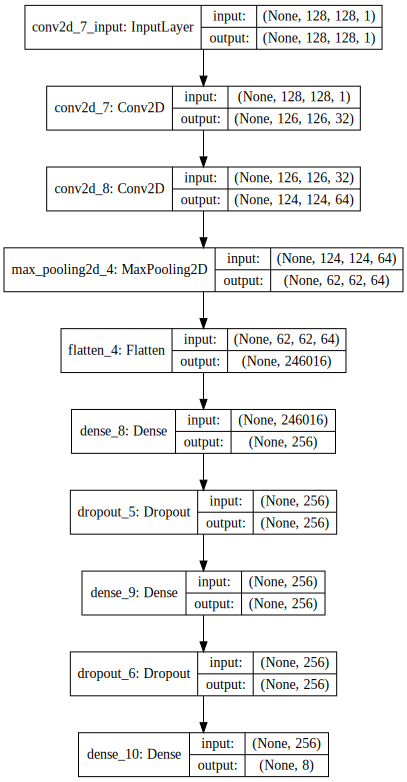

In [17]:
# Vizualize network achitecture
SVG(model_to_dot(classifier_04, show_shapes=True, show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [14]:
def construct_architecture_5(input_shape, num_classes):
    # instantiate model
    dnn_model = Sequential()
    # add convolution and pooling layers
    dnn_model.add(Conv2D(32, kernel_size=(3, 3), input_shape = input_shape, activation = 'relu'))
    dnn_model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
    dnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    dnn_model.add(Flatten())
    # add dense layers
    dnn_model.add(Dense(128, activation ='relu' ))
    dnn_model.add(Dropout(0.4))
    dnn_model.add(Dense(128, activation ='relu' ))
    dnn_model.add(Dropout(0.4))
    # define output layer
    dnn_model.add(Dense(num_classes, activation='softmax'))
    # compile model
    dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return dnn_model

# Create model instance
classifier_05 = construct_architecture_5(input_shape, num_classes)

# Run classifier
classifier_05 = run_model(classifier_05, 'classifier_05')

Train on 4767 samples, validate on 530 samples
Epoch 1/20
4767/4767 [==============================] - 437s 92ms/step - loss: 13.2143 - acc: 0.1779 - val_loss: 15.1449 - val_acc: 0.0604
Epoch 2/20
4767/4767 [==============================] - 424s 89ms/step - loss: 13.1562 - acc: 0.1838 - val_loss: 15.1449 - val_acc: 0.0604
Epoch 3/20
4767/4767 [==============================] - 425s 89ms/step - loss: 13.1528 - acc: 0.1840 - val_loss: 15.1449 - val_acc: 0.0604
Epoch 4/20
4767/4767 [==============================] - 398s 83ms/step - loss: 13.2001 - acc: 0.1810 - val_loss: 15.1449 - val_acc: 0.0604
Epoch 5/20
4767/4767 [==============================] - 386s 81ms/step - loss: 13.1190 - acc: 0.1861 - val_loss: 15.1449 - val_acc: 0.0604
Epoch 6/20
4767/4767 [==============================] - 394s 83ms/step - loss: 13.1528 - acc: 0.1840 - val_loss: 15.1449 - val_acc: 0.0604
Epoch 7/20
4767/4767 [==============================] - 434s 91ms/step - loss: 13.1629 - acc: 0.1833 - val_loss: 15.144

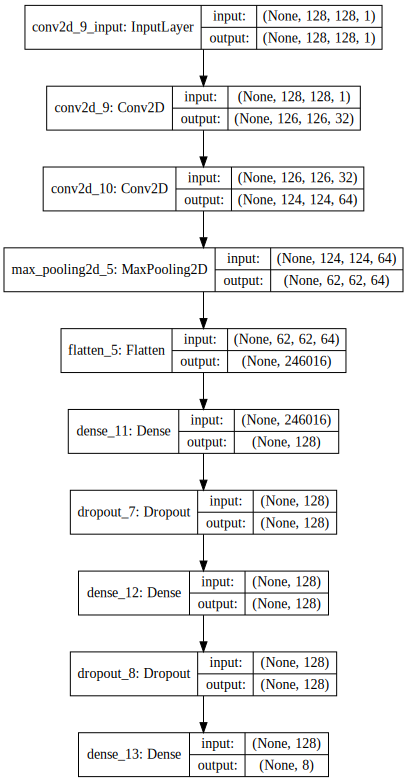

In [18]:
# Vizualize network achitecture
SVG(model_to_dot(classifier_05, show_shapes=True, show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

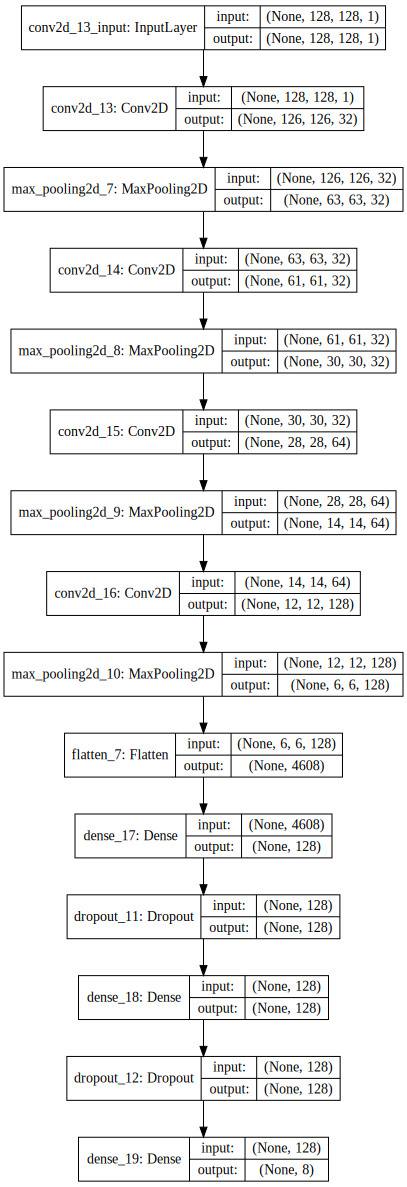

In [33]:
def construct_architecture_6(input_shape, num_classes):
    # instantiate model
    dnn_model = Sequential()
    # add convolution and pooling layers
    dnn_model.add( Conv2D(32, kernel_size=(3, 3), input_shape = input_shape, activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
    
    dnn_model.add( Conv2D(32, kernel_size=(3, 3), activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
              
    dnn_model.add( Conv2D(64, kernel_size=(3, 3), activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
              
    dnn_model.add( Conv2D(128, kernel_size=(3, 3), activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
    
    dnn_model.add( Flatten() )
    
    # add dense layers
    dnn_model.add( Dense(128, activation ='elu') )
    dnn_model.add( Dropout(0.4) )
    dnn_model.add( Dense(128, activation ='elu') )
    dnn_model.add( Dropout(0.4) )
    # define output layer
    dnn_model.add( Dense(num_classes, activation='softmax') )
    # compile model
    dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return dnn_model

# Create model instance
classifier_06 = construct_architecture_6(input_shape, num_classes)

# Vizualize network achitecture
SVG(model_to_dot(classifier_06, show_shapes=True, show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [39]:
# create a function that fits to training data
def run_model_2(classifier, filename):
    startTime = time.clock()
    
    # Define callbacks
    early_stopping_monitor = EarlyStopping(monitor='val_acc', patience=10)
    callbacks = [early_stopping_monitor]
    
    # Fit classifier
    history = classifier.fit(X_train, pd.get_dummies(y_train), epochs=20, 
                            batch_size = 128, validation_split=0.1, callbacks=callbacks)
    endTime = time.clock()
    print("Model is trained in {0} seconds!".format(endTime - startTime))
    
    # Saving the trained model
    print("Saving model...")
    save_files(classifier, history, filename)
    
    return classifier

In [37]:
# Run classifier
classifier_06 = run_model_2(classifier_06, 'classifier_06')

Train on 4767 samples, validate on 530 samples
Epoch 1/20
4767/4767 [==============================] - 130s 27ms/step - loss: 4.8016 - acc: 0.1997 - val_loss: 2.3145 - val_acc: 0.1830
Epoch 2/20
4767/4767 [==============================] - 128s 27ms/step - loss: 1.8402 - acc: 0.3843 - val_loss: 1.8750 - val_acc: 0.3453
Epoch 3/20
4767/4767 [==============================] - 127s 27ms/step - loss: 1.3288 - acc: 0.5492 - val_loss: 1.2841 - val_acc: 0.5868
Epoch 4/20
4767/4767 [==============================] - 127s 27ms/step - loss: 1.0884 - acc: 0.6260 - val_loss: 1.1189 - val_acc: 0.5736
Epoch 5/20
4767/4767 [==============================] - 128s 27ms/step - loss: 0.8097 - acc: 0.7248 - val_loss: 1.5972 - val_acc: 0.4132
Epoch 6/20
4767/4767 [==============================] - 127s 27ms/step - loss: 0.7071 - acc: 0.7623 - val_loss: 1.0167 - val_acc: 0.7132
Epoch 7/20
4767/4767 [==============================] - 128s 27ms/step - loss: 0.5607 - acc: 0.8118 - val_loss: 0.8241 - val_acc: 0

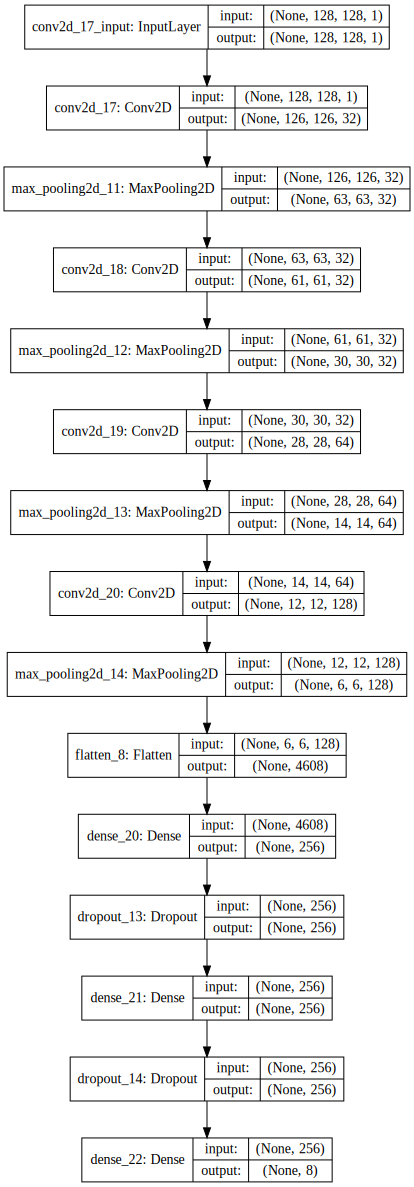

In [38]:
def construct_architecture_7(input_shape, num_classes):
    # instantiate model
    dnn_model = Sequential()
    # add convolution and pooling layers
    dnn_model.add( Conv2D(32, kernel_size=(3, 3), input_shape = input_shape, activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
    
    dnn_model.add( Conv2D(32, kernel_size=(3, 3), activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
              
    dnn_model.add( Conv2D(64, kernel_size=(3, 3), activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
              
    dnn_model.add( Conv2D(128, kernel_size=(3, 3), activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
    
    dnn_model.add( Flatten() )
    
    # add dense layers
    dnn_model.add( Dense(256, activation ='elu') )
    dnn_model.add( Dropout(0.4) )
    dnn_model.add( Dense(256, activation ='elu') )
    dnn_model.add( Dropout(0.4) )
    # define output layer
    dnn_model.add( Dense(num_classes, activation='softmax') )
    # compile model
    dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return dnn_model

# Create model instance
classifier_07 = construct_architecture_7(input_shape, num_classes)

# Vizualize network achitecture
SVG(model_to_dot(classifier_07, show_shapes=True, show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [40]:
# Run classifier
classifier_07 = run_model_2(classifier_07, 'classifier_07')

Train on 4767 samples, validate on 530 samples
Epoch 1/20
4767/4767 [==============================] - 146s 31ms/step - loss: 13.1026 - acc: 0.1833 - val_loss: 15.0233 - val_acc: 0.0679
Epoch 2/20
4767/4767 [==============================] - 135s 28ms/step - loss: 13.0345 - acc: 0.1913 - val_loss: 15.0233 - val_acc: 0.0679
Epoch 3/20
4767/4767 [==============================] - 139s 29ms/step - loss: 13.0311 - acc: 0.1915 - val_loss: 15.0233 - val_acc: 0.0679
Epoch 4/20
4767/4767 [==============================] - 133s 28ms/step - loss: 13.0311 - acc: 0.1915 - val_loss: 15.0233 - val_acc: 0.0679
Epoch 5/20
4767/4767 [==============================] - 132s 28ms/step - loss: 13.0345 - acc: 0.1913 - val_loss: 15.0233 - val_acc: 0.0679
Epoch 6/20
4767/4767 [==============================] - 134s 28ms/step - loss: 13.0311 - acc: 0.1915 - val_loss: 15.0233 - val_acc: 0.0679
Epoch 7/20
4767/4767 [==============================] - 135s 28ms/step - loss: 13.0345 - acc: 0.1913 - val_loss: 15.023

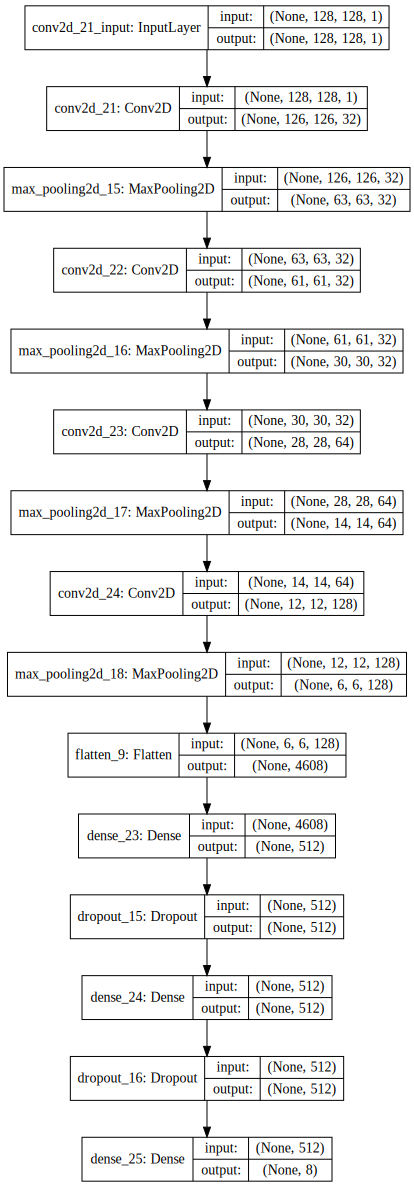

In [41]:
def construct_architecture_8(input_shape, num_classes):
    # instantiate model
    dnn_model = Sequential()
    # add convolution and pooling layers
    dnn_model.add( Conv2D(32, kernel_size=(3, 3), input_shape = input_shape, activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
    
    dnn_model.add( Conv2D(32, kernel_size=(3, 3), activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
              
    dnn_model.add( Conv2D(64, kernel_size=(3, 3), activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
              
    dnn_model.add( Conv2D(128, kernel_size=(3, 3), activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
    
    dnn_model.add( Flatten() )
    
    # add dense layers
    dnn_model.add( Dense(512, activation ='elu') )
    dnn_model.add( Dropout(0.4) )
    dnn_model.add( Dense(512, activation ='elu') )
    dnn_model.add( Dropout(0.4) )
    # define output layer
    dnn_model.add( Dense(num_classes, activation='softmax') )
    # compile model
    dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return dnn_model

# Create model instance
classifier_08 = construct_architecture_8(input_shape, num_classes)

# Vizualize network achitecture
SVG(model_to_dot(classifier_08, show_shapes=True, show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [42]:
# Run classifier
classifier_08 = run_model_2(classifier_08, 'classifier_08')

Train on 4767 samples, validate on 530 samples
Epoch 1/20
4767/4767 [==============================] - 132s 28ms/step - loss: 9.2918 - acc: 0.1848 - val_loss: 1.9909 - val_acc: 0.1868
Epoch 2/20
4767/4767 [==============================] - 131s 27ms/step - loss: 2.0063 - acc: 0.3600 - val_loss: 1.7023 - val_acc: 0.4604
Epoch 3/20
4767/4767 [==============================] - 131s 27ms/step - loss: 1.2864 - acc: 0.5685 - val_loss: 1.3320 - val_acc: 0.5830
Epoch 4/20
4767/4767 [==============================] - 130s 27ms/step - loss: 0.9492 - acc: 0.6709 - val_loss: 1.0440 - val_acc: 0.6000
Epoch 5/20
4767/4767 [==============================] - 130s 27ms/step - loss: 0.7404 - acc: 0.7426 - val_loss: 0.8528 - val_acc: 0.7000
Epoch 6/20
4767/4767 [==============================] - 131s 28ms/step - loss: 0.5757 - acc: 0.7992 - val_loss: 0.8496 - val_acc: 0.6906
Epoch 7/20
4767/4767 [==============================] - 131s 27ms/step - loss: 0.4774 - acc: 0.8318 - val_loss: 0.8176 - val_acc: 0

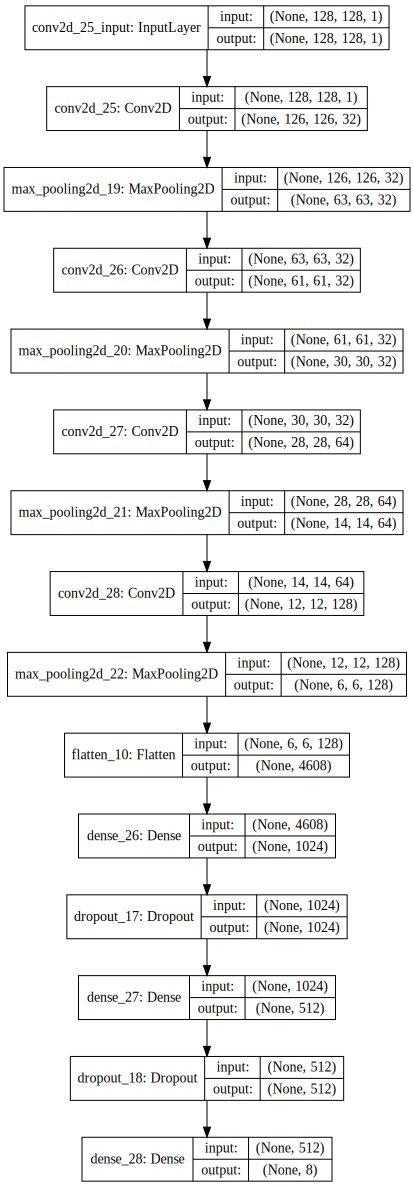

In [43]:
def construct_architecture_9(input_shape, num_classes):
    # instantiate model
    dnn_model = Sequential()
    # add convolution and pooling layers
    dnn_model.add( Conv2D(32, kernel_size=(3, 3), input_shape = input_shape, activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
    
    dnn_model.add( Conv2D(32, kernel_size=(3, 3), activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
              
    dnn_model.add( Conv2D(64, kernel_size=(3, 3), activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
              
    dnn_model.add( Conv2D(128, kernel_size=(3, 3), activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
    
    dnn_model.add( Flatten() )
    
    # add dense layers
    dnn_model.add( Dense(1024, activation ='elu') )
    dnn_model.add( Dropout(0.4) )
    dnn_model.add( Dense(512, activation ='elu') )
    dnn_model.add( Dropout(0.4) )
    # define output layer
    dnn_model.add( Dense(num_classes, activation='softmax') )
    # compile model
    dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return dnn_model

# Create model instance
classifier_09 = construct_architecture_9(input_shape, num_classes)

# Vizualize network achitecture
SVG(model_to_dot(classifier_09, show_shapes=True, show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [44]:
# Run classifier
classifier_09 = run_model_2(classifier_09, 'classifier_09')

Train on 4767 samples, validate on 530 samples
Epoch 1/20
4767/4767 [==============================] - 148s 31ms/step - loss: 12.8528 - acc: 0.1869 - val_loss: 15.0233 - val_acc: 0.0679
Epoch 2/20
4767/4767 [==============================] - 143s 30ms/step - loss: 13.0311 - acc: 0.1915 - val_loss: 15.0233 - val_acc: 0.0679
Epoch 3/20
4767/4767 [==============================] - 145s 30ms/step - loss: 13.0311 - acc: 0.1915 - val_loss: 15.0233 - val_acc: 0.0679
Epoch 4/20
4767/4767 [==============================] - 147s 31ms/step - loss: 13.0311 - acc: 0.1915 - val_loss: 15.0233 - val_acc: 0.0679
Epoch 5/20
4767/4767 [==============================] - 143s 30ms/step - loss: 13.0311 - acc: 0.1915 - val_loss: 15.0233 - val_acc: 0.0679
Epoch 6/20
4767/4767 [==============================] - 144s 30ms/step - loss: 13.0311 - acc: 0.1915 - val_loss: 15.0233 - val_acc: 0.0679
Epoch 7/20
4767/4767 [==============================] - 143s 30ms/step - loss: 13.0311 - acc: 0.1915 - val_loss: 15.023

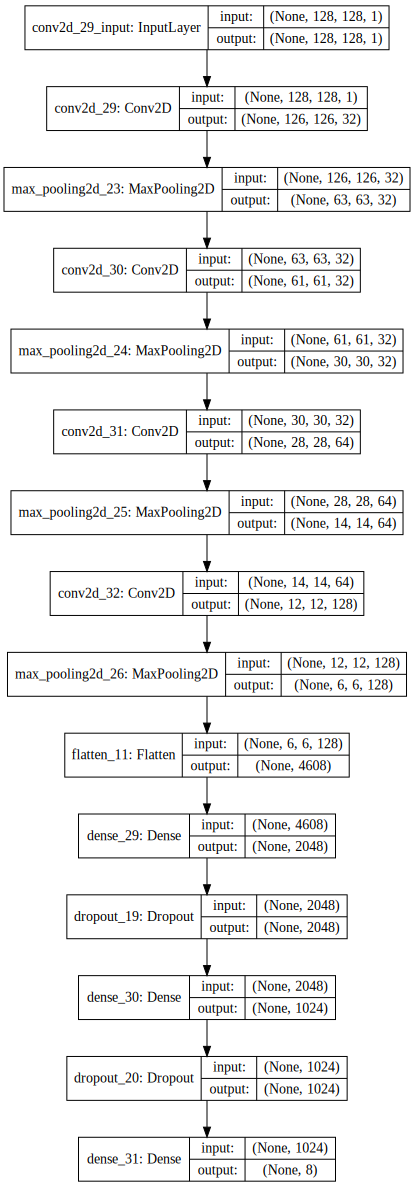

In [45]:
def construct_architecture_10(input_shape, num_classes):
    # instantiate model
    dnn_model = Sequential()
    # add convolution and pooling layers
    dnn_model.add( Conv2D(32, kernel_size=(3, 3), input_shape = input_shape, activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
    
    dnn_model.add( Conv2D(32, kernel_size=(3, 3), activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
              
    dnn_model.add( Conv2D(64, kernel_size=(3, 3), activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
              
    dnn_model.add( Conv2D(128, kernel_size=(3, 3), activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
    
    dnn_model.add( Flatten() )
    
    # add dense layers
    dnn_model.add( Dense(2048, activation ='elu') )
    dnn_model.add( Dropout(0.4) )
    dnn_model.add( Dense(1024, activation ='elu') )
    dnn_model.add( Dropout(0.4) )
    # define output layer
    dnn_model.add( Dense(num_classes, activation='softmax') )
    # compile model
    dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return dnn_model

# Create model instance
classifier_10 = construct_architecture_10(input_shape, num_classes)

# Vizualize network achitecture
SVG(model_to_dot(classifier_10, show_shapes=True, show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [46]:
# Run classifier
classifier_10 = run_model_2(classifier_10, 'classifier_10')

Train on 4767 samples, validate on 530 samples
Epoch 1/20
4767/4767 [==============================] - 155s 33ms/step - loss: 12.4286 - acc: 0.2249 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 2/20
4767/4767 [==============================] - 151s 32ms/step - loss: 12.5046 - acc: 0.2240 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 3/20
4767/4767 [==============================] - 151s 32ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 4/20
4767/4767 [==============================] - 152s 32ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 5/20
4767/4767 [==============================] - 151s 32ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 6/20
4767/4767 [==============================] - 150s 31ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 7/20
4767/4767 [==============================] - 151s 32ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.441

## Evaluate model performance

In [19]:
# Predict the labels
test_prediction_1 = classifier_01.predict_classes(X_test)
test_prediction_2 = classifier_02.predict_classes(X_test)
test_prediction_3 = classifier_03.predict_classes(X_test)
test_prediction_4 = classifier_04.predict_classes(X_test)
test_prediction_5 = classifier_05.predict_classes(X_test)

In [47]:
test_prediction_6 = classifier_06.predict_classes(X_test)
test_prediction_7 = classifier_07.predict_classes(X_test)
test_prediction_8 = classifier_08.predict_classes(X_test)
test_prediction_9 = classifier_09.predict_classes(X_test)
test_prediction_10 = classifier_10.predict_classes(X_test)

In [20]:
# Create labels
labels = [0,1,2,3,4,5,6,7]

In [27]:
# Calculate and print the confusion matrix
test_cm_1 = metrics.confusion_matrix(y_test, test_prediction_1, labels=labels)
print('For the confusion matrix, rows correspond to actual ratings and the columns correspond to predicted ratings.')
print(test_cm_1)
test_cm_2 = metrics.confusion_matrix(y_test, test_prediction_2, labels=labels)
print(test_cm_2)
test_cm_3 = metrics.confusion_matrix(y_test, test_prediction_3, labels=labels)
print(test_cm_3)
test_cm_4 = metrics.confusion_matrix(y_test, test_prediction_4, labels=labels)
print(test_cm_4)
test_cm_5 = metrics.confusion_matrix(y_test, test_prediction_5, labels=labels)
print(test_cm_5)

For the confusion matrix, rows correspond to actual ratings and the columns correspond to predicted ratings.
[[  0   0 107  25   0   0   0   0]
 [  0   0  81  22   0   0   0   0]
 [  0   0   5   5   0   0   0   0]
 [  0   0  47  17   0   0   0   0]
 [  0   0  25   8   0   0   0   0]
 [  0   0  99   7   0   0   0   0]
 [  0   0  44  11   2   0   0   0]
 [  0   0  47  27   0   0   0   0]]
[[132   0   0   0   0   0   0   0]
 [103   0   0   0   0   0   0   0]
 [ 10   0   0   0   0   0   0   0]
 [ 64   0   0   0   0   0   0   0]
 [ 33   0   0   0   0   0   0   0]
 [106   0   0   0   0   0   0   0]
 [ 57   0   0   0   0   0   0   0]
 [ 74   0   0   0   0   0   0   0]]
[[  0   0   0   0   0   0   0 132]
 [  0   0   0   0   0   0   0 103]
 [  0   0   0   0   0   0   0  10]
 [  0   0   0   0   0   0   0  64]
 [  0   0   0   0   0   0   0  33]
 [  0   0   0   0   0   0   0 106]
 [  0   0   0   0   0   0   0  57]
 [  0   0   0   0   0   0   0  74]]
[[  0 132   0   0   0   0   0   0]
 [  0 103   0

In [49]:
# Calculate and print the confusion matrix
test_cm_6 = metrics.confusion_matrix(y_test, test_prediction_6, labels=labels)
print('For the confusion matrix, rows correspond to actual ratings and the columns correspond to predicted ratings.')
print('Classifier 6:')
print(test_cm_6)
print('')
test_cm_7 = metrics.confusion_matrix(y_test, test_prediction_7, labels=labels)
print('Classifier 7:')
print(test_cm_7)
print('')
print('Classifier 8:')
test_cm_8 = metrics.confusion_matrix(y_test, test_prediction_8, labels=labels)
print(test_cm_8)
print('')
print('Classifier 9:')
test_cm_9 = metrics.confusion_matrix(y_test, test_prediction_9, labels=labels)
print(test_cm_9)
print('')
print('Classifier 10:')
test_cm_10 = metrics.confusion_matrix(y_test, test_prediction_10, labels=labels)
print(test_cm_10)

For the confusion matrix, rows correspond to actual ratings and the columns correspond to predicted ratings.
Classifier 6:
[[116   4   0   1   0   1   4   6]
 [ 37  50   0   7   0   0   7   2]
 [  4   0   1   0   3   2   0   0]
 [  7   0   0  57   0   0   0   0]
 [  7   0   0   0  12   0   3  11]
 [ 19   0   0   2   4  80   0   1]
 [ 32   1   0   0   5   0  19   0]
 [  6   0   0   0   0   0   0  68]]

Classifier 7:
[[  0   0   0   0   0 132   0   0]
 [  0   0   0   0   0 103   0   0]
 [  0   0   0   0   0  10   0   0]
 [  0   0   0   0   0  64   0   0]
 [  0   0   0   0   0  33   0   0]
 [  0   0   0   0   0 106   0   0]
 [  0   0   0   0   0  57   0   0]
 [  0   0   0   0   0  74   0   0]]

Classifier 8:
[[109   7   0   9   3   2   0   2]
 [ 29  62   0  10   0   0   2   0]
 [  8   1   1   0   0   0   0   0]
 [ 10   0   0  54   0   0   0   0]
 [  9   0   0   0  10   0   1  13]
 [ 19   0   0   3   2  82   0   0]
 [ 35   9   0   0   1   1  11   0]
 [ 10   0   0   0   0   0   0  64]]

Cla

In [54]:
# Compute overall metrics for classifiers
print('Classifier 6:')
test_score_6 = metrics.accuracy_score(y_test, test_prediction_6)
print("Accuracy: {:.3}".format(test_score_6))
test_precision_6 = metrics.precision_score(y_test, test_prediction_6, average = 'weighted')
print("Precision: {:.3}".format(test_precision_6))
test_recall_6 = metrics.recall_score(y_test, test_prediction_6, average = 'weighted')
print("Recall: {:.3}".format(test_recall_6))

print('')
print('Classifier 8:')
test_score_8 = metrics.accuracy_score(y_test, test_prediction_8)
print("Accuracy: {:.3}".format(test_score_8))
test_precision_8 = metrics.precision_score(y_test, test_prediction_8, average = 'weighted')
print("Precision: {:.3}".format(test_precision_8))
test_recall_8 = metrics.recall_score(y_test, test_prediction_8, average = 'weighted')
print("Recall: {:.3}".format(test_recall_8))

Classifier 6:
Accuracy: 0.696
Precision: 0.749
Recall: 0.696

Classifier 8:
Accuracy: 0.679
Precision: 0.737
Recall: 0.679


In [55]:
# Compute precision and recall for classes in classifier 6 
precision, recall, fscore, support = score(y_test, test_prediction_6)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

precision: [ 0.50877193  0.90909091  1.          0.85074627  0.5         0.96385542
  0.57575758  0.77272727]
recall: [ 0.87878788  0.48543689  0.1         0.890625    0.36363636  0.75471698
  0.33333333  0.91891892]


# Tune leading architecture

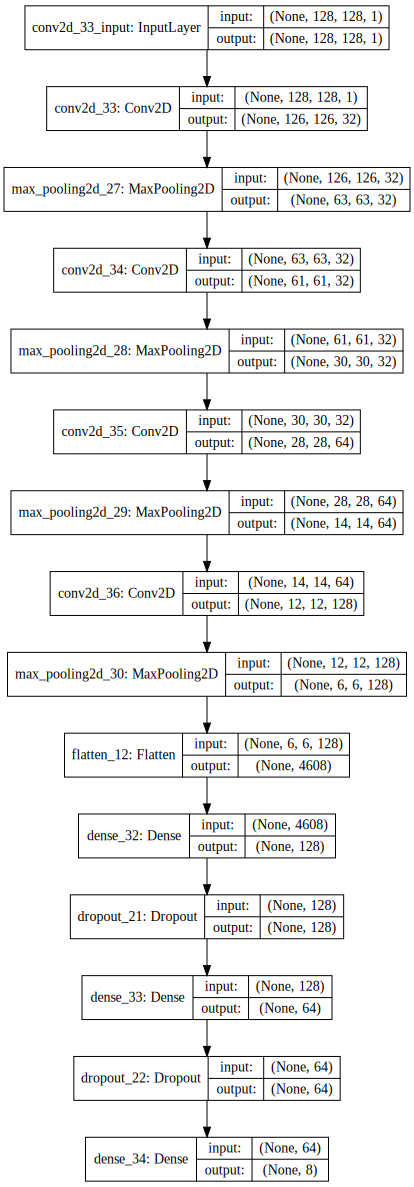

In [56]:
def construct_architecture_11(input_shape, num_classes):
    # instantiate model
    dnn_model = Sequential()
    # add convolution and pooling layers
    dnn_model.add( Conv2D(32, kernel_size=(3, 3), input_shape = input_shape, activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
    
    dnn_model.add( Conv2D(32, kernel_size=(3, 3), activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
              
    dnn_model.add( Conv2D(64, kernel_size=(3, 3), activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
              
    dnn_model.add( Conv2D(128, kernel_size=(3, 3), activation = 'elu') )
    dnn_model.add( MaxPooling2D(pool_size=(2, 2)) )
    
    dnn_model.add( Flatten() )
    
    # add dense layers
    dnn_model.add( Dense(128, activation ='elu') )
    dnn_model.add( Dropout(0.4) )
    dnn_model.add( Dense(64, activation ='elu') )
    dnn_model.add( Dropout(0.4) )
    # define output layer
    dnn_model.add( Dense(num_classes, activation='softmax') )
    # compile model
    dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return dnn_model

# Create model instance
classifier_11 = construct_architecture_11(input_shape, num_classes)

# Vizualize network achitecture
SVG(model_to_dot(classifier_11, show_shapes=True, show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [57]:
# create a function that fits to training data
def run_model_3(classifier, filename):
    startTime = time.clock()
    
    # Define callbacks
    early_stopping_monitor = EarlyStopping(monitor='val_acc', patience=10)
    callbacks = [early_stopping_monitor]
    
    # Fit classifier
    history = classifier.fit(X_train, pd.get_dummies(y_train), epochs=100, 
                            batch_size = 128, validation_split=0.1, callbacks=callbacks)
    endTime = time.clock()
    print("Model is trained in {0} seconds!".format(endTime - startTime))
    
    # Saving the trained model
    print("Saving model...")
    save_files(classifier, history, filename)
    
    return classifier

In [58]:
# Run classifier
classifier_11 = run_model_3(classifier_11, 'classifier_11')

Train on 4767 samples, validate on 530 samples
Epoch 1/100
4767/4767 [==============================] - 134s 28ms/step - loss: 12.6759 - acc: 0.1991 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 2/100
4767/4767 [==============================] - 133s 28ms/step - loss: 5.2217 - acc: 0.1852 - val_loss: 2.4095 - val_acc: 0.1208
Epoch 3/100
4767/4767 [==============================] - 123s 26ms/step - loss: 1.8890 - acc: 0.3537 - val_loss: 1.5667 - val_acc: 0.3906
Epoch 4/100
4767/4767 [==============================] - 129s 27ms/step - loss: 1.4063 - acc: 0.5179 - val_loss: 1.4995 - val_acc: 0.4302
Epoch 5/100
4767/4767 [==============================] - 132s 28ms/step - loss: 1.1778 - acc: 0.5937 - val_loss: 1.2196 - val_acc: 0.5830
Epoch 6/100
4767/4767 [==============================] - 148s 31ms/step - loss: 0.9959 - acc: 0.6562 - val_loss: 1.0507 - val_acc: 0.5981
Epoch 7/100
4767/4767 [==============================] - 136s 29ms/step - loss: 0.8390 - acc: 0.7090 - val_loss: 1.0778 - v

In [60]:
test_prediction_11 = classifier_11.predict_classes(X_test)

In [62]:
test_cm_11 = metrics.confusion_matrix(y_test, test_prediction_11, labels=labels)
print('For the confusion matrix, rows correspond to actual ratings and the columns correspond to predicted ratings.')
print('Classifier 11:')
print(test_cm_11)
print('')
print('Classifier 11:')
test_score_11 = metrics.accuracy_score(y_test, test_prediction_11)
print("Accuracy: {:.3}".format(test_score_11))
test_precision_11 = metrics.precision_score(y_test, test_prediction_11, average = 'weighted')
print("Precision: {:.3}".format(test_precision_11))
test_recall_11 = metrics.recall_score(y_test, test_prediction_11, average = 'weighted')
print("Recall: {:.3}".format(test_recall_11))
print('')

# Compute precision and recall for classes in classifier 11
precision, recall, fscore, support = score(y_test, test_prediction_11)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

For the confusion matrix, rows correspond to actual ratings and the columns correspond to predicted ratings.
Classifier 11:
[[121   2   0   2   1   4   0   2]
 [ 38  48   0   3   1   0  11   2]
 [  9   0   0   0   1   0   0   0]
 [ 14   0   0  50   0   0   0   0]
 [  8   0   0   0   6   0   1  18]
 [ 20   0   0   0   0  86   0   0]
 [ 23   4   0   3   8   0  15   4]
 [  4   0   0   1   0   0   0  69]]

Classifier 11:
Accuracy: 0.682
Precision: 0.711
Recall: 0.682

precision: [ 0.51054852  0.88888889  0.          0.84745763  0.35294118  0.95555556
  0.55555556  0.72631579]
recall: [ 0.91666667  0.46601942  0.          0.78125     0.18181818  0.81132075
  0.26315789  0.93243243]


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Old architectures with more epochs

In [68]:
# create a function that fits to training data
def run_model_4(classifier, filename):
    startTime = time.clock()
    
    # Fit classifier
    history = classifier.fit(X_train, pd.get_dummies(y_train), epochs=200, 
                            batch_size = 512, validation_split=0.1)
    endTime = time.clock()
    print("Model is trained in {0} seconds!".format(endTime - startTime))
    
    # Saving the trained model
    print("Saving model...")
    save_files(classifier, history, filename)
    
    return classifier

In [69]:
# Run classifier
classifier_12 = run_model_4(classifier_10, 'classifier_12')

Train on 4767 samples, validate on 530 samples
Epoch 1/200
4767/4767 [==============================] - 148s 31ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 2/200
4767/4767 [==============================] - 155s 32ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 3/200
4767/4767 [==============================] - 163s 34ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 4/200
4767/4767 [==============================] - 164s 34ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 5/200
4767/4767 [==============================] - 166s 35ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 6/200
4767/4767 [==============================] - 170s 36ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 7/200
4767/4767 [==============================] - 164s 34ms/step - loss: 12.4394 - acc: 0.2282 - val_loss:

Epoch 59/200
4767/4767 [==============================] - 206s 43ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 60/200
4767/4767 [==============================] - 198s 42ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 61/200
4767/4767 [==============================] - 200s 42ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 62/200
4767/4767 [==============================] - 196s 41ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 63/200
4767/4767 [==============================] - 198s 41ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 64/200
4767/4767 [==============================] - 196s 41ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 65/200
4767/4767 [==============================] - 195s 41ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 66/200


Epoch 117/200
4767/4767 [==============================] - 160s 34ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 118/200
4767/4767 [==============================] - 228s 48ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 119/200
4767/4767 [==============================] - 291s 61ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 120/200
4767/4767 [==============================] - 217s 45ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 121/200
4767/4767 [==============================] - 150s 32ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 122/200
4767/4767 [==============================] - 154s 32ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 123/200
4767/4767 [==============================] - 216s 45ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 

Epoch 175/200
4767/4767 [==============================] - 150s 32ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 176/200
4767/4767 [==============================] - 141s 29ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 177/200
4767/4767 [==============================] - 142s 30ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 178/200
4767/4767 [==============================] - 141s 30ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 179/200
4767/4767 [==============================] - 142s 30ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 180/200
4767/4767 [==============================] - 140s 29ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 181/200
4767/4767 [==============================] - 141s 30ms/step - loss: 12.4394 - acc: 0.2282 - val_loss: 13.4419 - val_acc: 0.1660
Epoch 

Model saved


In [70]:
test_prediction_12 = classifier_12.predict_classes(X_test)

In [71]:
test_cm_12 = metrics.confusion_matrix(y_test, test_prediction_12, labels=labels)
print('For the confusion matrix, rows correspond to actual ratings and the columns correspond to predicted ratings.')
print('Classifier 12:')
print(test_cm_12)
print('')
print('Classifier 12:')
test_score_12 = metrics.accuracy_score(y_test, test_prediction_12)
print("Accuracy: {:.3}".format(test_score_12))
test_precision_12 = metrics.precision_score(y_test, test_prediction_12, average = 'weighted')
print("Precision: {:.3}".format(test_precision_12))
test_recall_12 = metrics.recall_score(y_test, test_prediction_12, average = 'weighted')
print("Recall: {:.3}".format(test_recall_12))
print('')

# Compute precision and recall for classes in classifier 12
precision, recall, fscore, support = score(y_test, test_prediction_12)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

For the confusion matrix, rows correspond to actual ratings and the columns correspond to predicted ratings.
Classifier 12:
[[132   0   0   0   0   0   0   0]
 [103   0   0   0   0   0   0   0]
 [ 10   0   0   0   0   0   0   0]
 [ 64   0   0   0   0   0   0   0]
 [ 33   0   0   0   0   0   0   0]
 [106   0   0   0   0   0   0   0]
 [ 57   0   0   0   0   0   0   0]
 [ 74   0   0   0   0   0   0   0]]

Classifier 12:
Accuracy: 0.228
Precision: 0.052
Recall: 0.228

precision: [ 0.22797927  0.          0.          0.          0.          0.          0.
  0.        ]
recall: [ 1.  0.  0.  0.  0.  0.  0.  0.]


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Visualize convolution layer outputs of classifier 6

In [93]:
from keras import backend as K

first_conv_layer = K.function([classifier_06.layers[0].input, K.learning_phase()], 
                              [classifier_06.layers[0].output])
second_conv_layer = K.function([classifier_06.layers[0].input, K.learning_phase()], 
                               [classifier_06.layers[2].output])
third_conv_layer = K.function([classifier_06.layers[0].input, K.learning_phase()], 
                               [classifier_06.layers[3].output])
fourth_conv_layer = K.function([classifier_06.layers[0].input, K.learning_phase()], 
                               [classifier_06.layers[4].output])

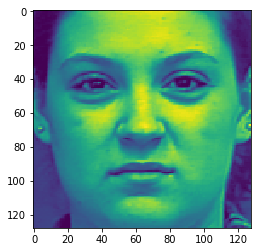

In [79]:
image_side = X_test[0].shape[1]
image = np.reshape(X_test[0], (image_side, image_side) )
plt.imshow(image)
plt.show()

image_input = np.reshape(X_test[0], (1, image_side, image_side, 1) )

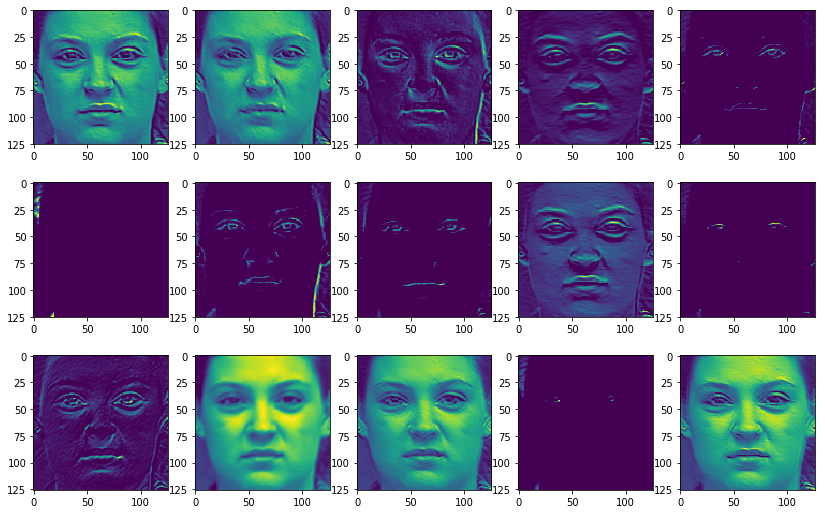

In [89]:
# extract feaures of first convolution layer
first_conv_features = first_conv_layer([image_input])[0][0]

# # view feature representations
fig = plt.figure(figsize = (14,9))
ax1 = fig.add_subplot(3,5, 1)
ax1.imshow(first_conv_features[:,:,0])
ax2 = fig.add_subplot(3,5, 2)
ax2.imshow(first_conv_features[:,:,1])
ax3 = fig.add_subplot(3,5, 3)
ax3.imshow(first_conv_features[:,:,2])
ax4 = fig.add_subplot(3,5, 4)
ax4.imshow(first_conv_features[:,:,3])
ax5 = fig.add_subplot(3,5, 5)
ax5.imshow(first_conv_features[:,:,4])
ax6 = fig.add_subplot(3,5, 6)
ax6.imshow(first_conv_features[:,:,5])
ax7 = fig.add_subplot(3,5, 7)
ax7.imshow(first_conv_features[:,:,6])
ax8 = fig.add_subplot(3,5, 8)
ax8.imshow(first_conv_features[:,:,7])
ax9 = fig.add_subplot(3,5, 9)
ax9.imshow(first_conv_features[:,:,8])
ax10 = fig.add_subplot(3,5, 10)
ax10.imshow(first_conv_features[:,:,9])
ax11 = fig.add_subplot(3,5, 11)
ax11.imshow(first_conv_features[:,:,10])
ax12 = fig.add_subplot(3,5, 12)
ax12.imshow(first_conv_features[:,:,11])
ax13 = fig.add_subplot(3,5, 13)
ax13.imshow(first_conv_features[:,:,12])
ax14 = fig.add_subplot(3,5, 14)
ax14.imshow(first_conv_features[:,:,13])
ax15 = fig.add_subplot(3,5, 15)
ax15.imshow(first_conv_features[:,:,14])

plt.show()

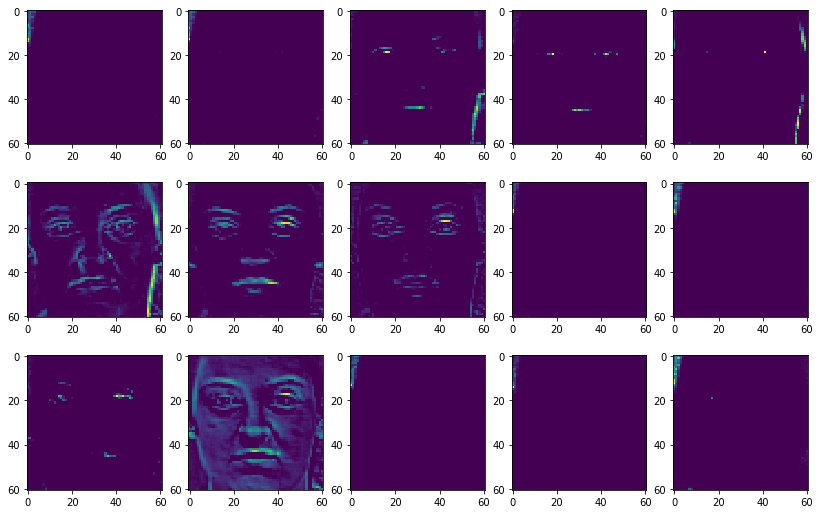

In [88]:
# extract feaures of second convolution layer
second_conv_features = second_conv_layer([image_input])[0][0]

# # view feature representations
fig = plt.figure(figsize = (14,9))
ax1 = fig.add_subplot(3,5, 1)
ax1.imshow(second_conv_features[:,:,0])
ax2 = fig.add_subplot(3,5, 2)
ax2.imshow(second_conv_features[:,:,1])
ax3 = fig.add_subplot(3,5, 3)
ax3.imshow(second_conv_features[:,:,2])
ax4 = fig.add_subplot(3,5, 4)
ax4.imshow(second_conv_features[:,:,3])
ax5 = fig.add_subplot(3,5, 5)
ax5.imshow(second_conv_features[:,:,4])
ax6 = fig.add_subplot(3,5, 6)
ax6.imshow(second_conv_features[:,:,5])
ax7 = fig.add_subplot(3,5, 7)
ax7.imshow(second_conv_features[:,:,6])
ax8 = fig.add_subplot(3,5, 8)
ax8.imshow(second_conv_features[:,:,7])
ax9 = fig.add_subplot(3,5, 9)
ax9.imshow(second_conv_features[:,:,8])
ax10 = fig.add_subplot(3,5, 10)
ax10.imshow(second_conv_features[:,:,9])
ax11 = fig.add_subplot(3,5, 11)
ax11.imshow(second_conv_features[:,:,10])
ax12 = fig.add_subplot(3,5, 12)
ax12.imshow(second_conv_features[:,:,11])
ax13 = fig.add_subplot(3,5, 13)
ax13.imshow(second_conv_features[:,:,12])
ax14 = fig.add_subplot(3,5, 14)
ax14.imshow(second_conv_features[:,:,13])
ax15 = fig.add_subplot(3,5, 15)
ax15.imshow(second_conv_features[:,:,14])

plt.show()

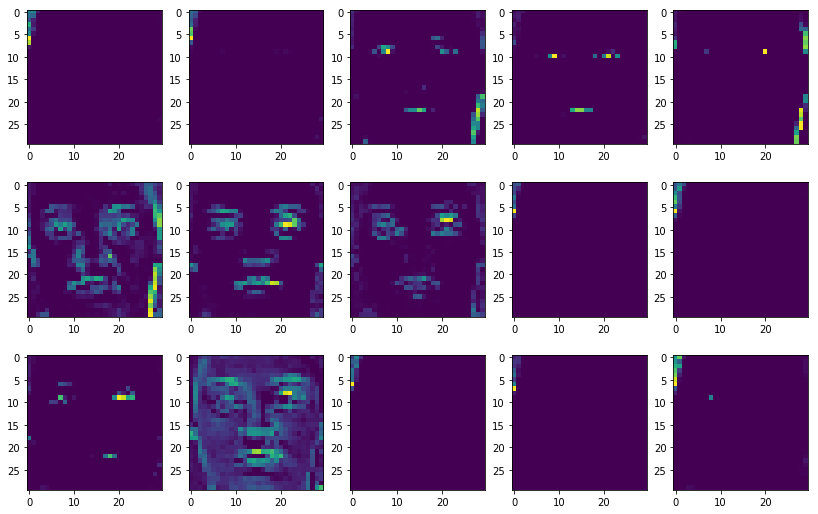

In [91]:
# extract feaures of third convolution layer
third_conv_features = third_conv_layer([image_input])[0][0]

# # view feature representations
fig = plt.figure(figsize = (14,9))
ax1 = fig.add_subplot(3,5, 1)
ax1.imshow(third_conv_features[:,:,0])
ax2 = fig.add_subplot(3,5, 2)
ax2.imshow(third_conv_features[:,:,1])
ax3 = fig.add_subplot(3,5, 3)
ax3.imshow(third_conv_features[:,:,2])
ax4 = fig.add_subplot(3,5, 4)
ax4.imshow(third_conv_features[:,:,3])
ax5 = fig.add_subplot(3,5, 5)
ax5.imshow(third_conv_features[:,:,4])
ax6 = fig.add_subplot(3,5, 6)
ax6.imshow(third_conv_features[:,:,5])
ax7 = fig.add_subplot(3,5, 7)
ax7.imshow(third_conv_features[:,:,6])
ax8 = fig.add_subplot(3,5, 8)
ax8.imshow(third_conv_features[:,:,7])
ax9 = fig.add_subplot(3,5, 9)
ax9.imshow(third_conv_features[:,:,8])
ax10 = fig.add_subplot(3,5, 10)
ax10.imshow(third_conv_features[:,:,9])
ax11 = fig.add_subplot(3,5, 11)
ax11.imshow(third_conv_features[:,:,10])
ax12 = fig.add_subplot(3,5, 12)
ax12.imshow(third_conv_features[:,:,11])
ax13 = fig.add_subplot(3,5, 13)
ax13.imshow(third_conv_features[:,:,12])
ax14 = fig.add_subplot(3,5, 14)
ax14.imshow(third_conv_features[:,:,13])
ax15 = fig.add_subplot(3,5, 15)
ax15.imshow(third_conv_features[:,:,14])

plt.show()

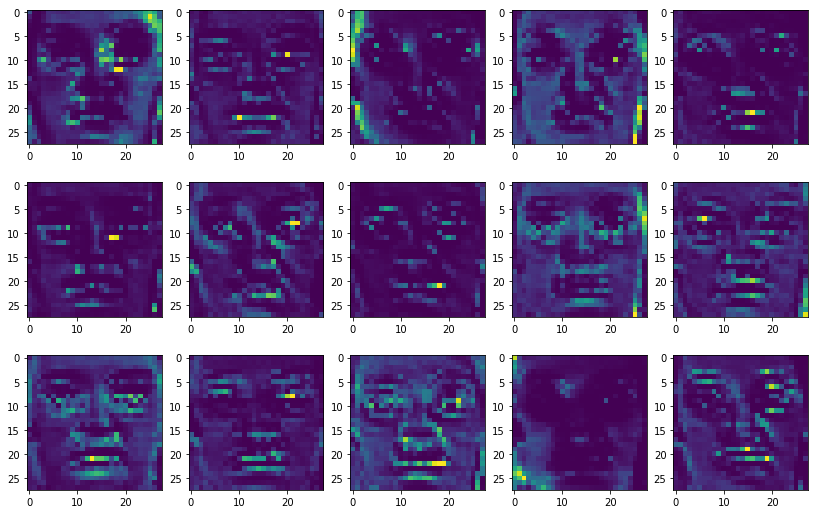

In [94]:
# extract feaures of fourth convolution layer
fourth_conv_features = fourth_conv_layer([image_input])[0][0]

# # view feature representations
fig = plt.figure(figsize = (14,9))
ax1 = fig.add_subplot(3,5, 1)
ax1.imshow(fourth_conv_features[:,:,0])
ax2 = fig.add_subplot(3,5, 2)
ax2.imshow(fourth_conv_features[:,:,1])
ax3 = fig.add_subplot(3,5, 3)
ax3.imshow(fourth_conv_features[:,:,2])
ax4 = fig.add_subplot(3,5, 4)
ax4.imshow(fourth_conv_features[:,:,3])
ax5 = fig.add_subplot(3,5, 5)
ax5.imshow(fourth_conv_features[:,:,4])
ax6 = fig.add_subplot(3,5, 6)
ax6.imshow(fourth_conv_features[:,:,5])
ax7 = fig.add_subplot(3,5, 7)
ax7.imshow(fourth_conv_features[:,:,6])
ax8 = fig.add_subplot(3,5, 8)
ax8.imshow(fourth_conv_features[:,:,7])
ax9 = fig.add_subplot(3,5, 9)
ax9.imshow(fourth_conv_features[:,:,8])
ax10 = fig.add_subplot(3,5, 10)
ax10.imshow(fourth_conv_features[:,:,9])
ax11 = fig.add_subplot(3,5, 11)
ax11.imshow(fourth_conv_features[:,:,10])
ax12 = fig.add_subplot(3,5, 12)
ax12.imshow(fourth_conv_features[:,:,11])
ax13 = fig.add_subplot(3,5, 13)
ax13.imshow(fourth_conv_features[:,:,12])
ax14 = fig.add_subplot(3,5, 14)
ax14.imshow(fourth_conv_features[:,:,13])
ax15 = fig.add_subplot(3,5, 15)
ax15.imshow(fourth_conv_features[:,:,14])

plt.show()

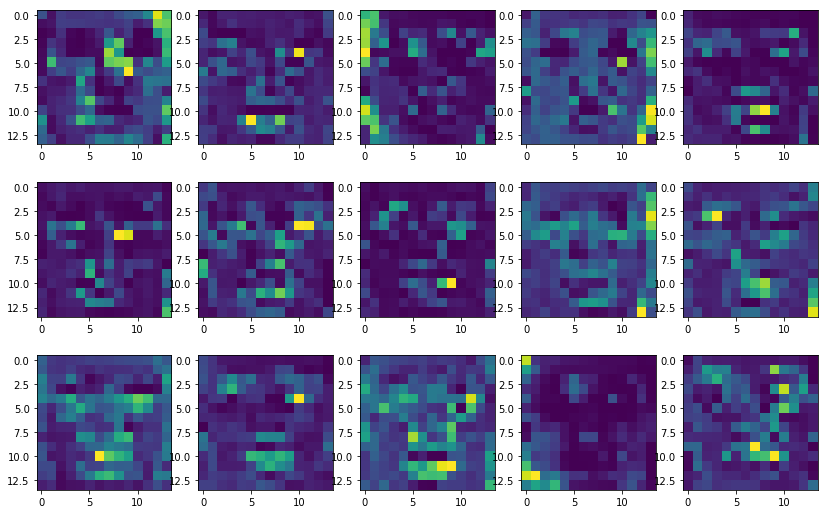

In [95]:
fifth_conv_layer = K.function([classifier_06.layers[0].input, K.learning_phase()], 
                               [classifier_06.layers[5].output])

# extract feaures of fourth convolution layer
fifth_conv_features = fifth_conv_layer([image_input])[0][0]

# # view feature representations
fig = plt.figure(figsize = (14,9))
ax1 = fig.add_subplot(3,5, 1)
ax1.imshow(fifth_conv_features[:,:,0])
ax2 = fig.add_subplot(3,5, 2)
ax2.imshow(fifth_conv_features[:,:,1])
ax3 = fig.add_subplot(3,5, 3)
ax3.imshow(fifth_conv_features[:,:,2])
ax4 = fig.add_subplot(3,5, 4)
ax4.imshow(fifth_conv_features[:,:,3])
ax5 = fig.add_subplot(3,5, 5)
ax5.imshow(fifth_conv_features[:,:,4])
ax6 = fig.add_subplot(3,5, 6)
ax6.imshow(fifth_conv_features[:,:,5])
ax7 = fig.add_subplot(3,5, 7)
ax7.imshow(fifth_conv_features[:,:,6])
ax8 = fig.add_subplot(3,5, 8)
ax8.imshow(fifth_conv_features[:,:,7])
ax9 = fig.add_subplot(3,5, 9)
ax9.imshow(fifth_conv_features[:,:,8])
ax10 = fig.add_subplot(3,5, 10)
ax10.imshow(fifth_conv_features[:,:,9])
ax11 = fig.add_subplot(3,5, 11)
ax11.imshow(fifth_conv_features[:,:,10])
ax12 = fig.add_subplot(3,5, 12)
ax12.imshow(fifth_conv_features[:,:,11])
ax13 = fig.add_subplot(3,5, 13)
ax13.imshow(fifth_conv_features[:,:,12])
ax14 = fig.add_subplot(3,5, 14)
ax14.imshow(fifth_conv_features[:,:,13])
ax15 = fig.add_subplot(3,5, 15)
ax15.imshow(fifth_conv_features[:,:,14])

plt.show()